In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [3]:
# Cargar datos desde el archivo CSV
datos = pd.read_csv(filepath_or_buffer = "/home/darok/Documentos/Escuela/IEDC/uteq/Evalucion2/comprar_alquilar.csv")


In [4]:
datos

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [6]:
#definimos X, y
y = datos['comprar']
X = datos.drop(['comprar'], axis=1)

#normalizando los datos
scaler=StandardScaler()
scaler.fit(X) # calculando la media para poder hacer la transformacion
X_scaled=scaler.transform(X)# escalando los datos y normalizandolos

X_scaled


array([[ 0.62012866,  0.10468863, -1.69895439, ..., -1.22708822,
         0.5623736 , -0.98441983],
       [ 1.0639266 , -0.10162457, -0.71204191, ..., -0.02963981,
         1.29527339,  0.59691461],
       [ 0.89117304,  0.22626604, -0.91263388, ...,  1.1678086 ,
        -0.17052619,  1.38758182],
       ...,
       [-1.05736798, -0.06109876,  0.51558094, ..., -0.02963981,
         1.29527339,  1.38758182],
       [-0.96801269, -0.38530521,  1.26178306, ..., -0.02963981,
         0.5623736 ,  0.201581  ],
       [-0.57842363,  0.68310241, -0.85646812, ..., -1.22708822,
        -0.90342598, -0.19375261]])

In [10]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=9) 

pca.fit(X_scaled) # obtener los componentes principales
# Obtener los autovalores
autovalores = pca.explained_variance_

autovalores
# Obtener los autovectores
autovectores = pca.components_
autovectores

array([[-4.93720326e-01, -3.18228652e-01,  1.23770585e-01,
         1.11875722e-01, -4.44650306e-01, -4.62608605e-01,
         2.52278902e-01,  2.59858682e-01,  2.90247540e-01],
       [ 3.06958523e-01,  1.47372634e-01, -9.16409584e-02,
         1.11593405e-04,  2.88434882e-01,  1.48984886e-01,
         4.69043960e-01,  5.21893872e-01,  5.27155638e-01],
       [ 9.14192492e-02,  3.63453156e-01,  5.16144106e-01,
        -7.01985912e-01, -1.91767355e-01, -1.40513292e-01,
         1.72884784e-01, -1.12183561e-01,  3.69101842e-02],
       [ 1.11222044e-01,  8.16296251e-02,  7.80267686e-01,
         5.90704378e-01,  2.28391302e-02,  1.50085403e-01,
        -7.66309571e-03,  7.40404830e-03, -7.49271067e-03],
       [ 8.88965452e-02,  7.63005855e-01, -2.65553621e-01,
         3.30743735e-01, -2.89002223e-01, -3.65555555e-01,
        -1.04638865e-01,  4.36678973e-02,  8.65473020e-06],
       [-7.54772584e-02,  6.79027972e-02, -1.53696523e-01,
         1.54422329e-01, -2.30180519e-01,  2.907985

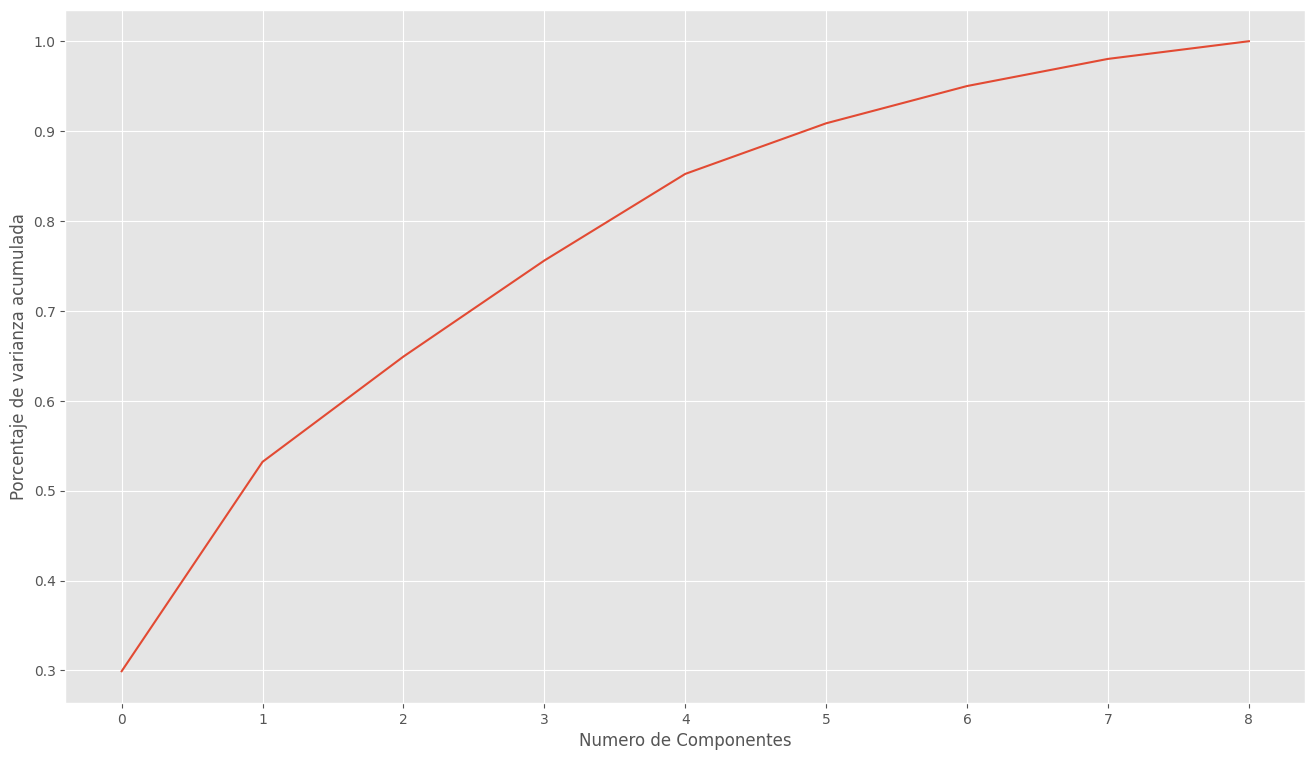

In [9]:
#graficamos el acumulado de varianza
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
plt.plot(np.cumsum(pca.explained_variance_ratio_,))
plt.xlabel('Numero de Componentes')
plt.ylabel('Porcentaje de varianza acumulada')
plt.show()

In [11]:
#definimos los nombres de nuestras dimenciones
nombres = datos.columns

autovectores_df = pd.DataFrame(autovectores)
autovectores_df.columns = nombres[0:9]
autovectores_df

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
0,-0.493720,-0.318229,0.123771,0.111876,-0.444650,-0.462609,0.252279,0.259859,0.290248
1,0.306959,0.147373,-0.091641,0.000112,0.288435,0.148985,0.469044,0.521894,0.527156
2,0.091419,0.363453,0.516144,-0.701986,-0.191767,-0.140513,0.172885,-0.112184,0.036910
3,0.111222,0.081630,0.780268,0.590704,0.022839,0.150085,-0.007663,0.007404,-0.007493
4,0.088897,0.763006,-0.265554,0.330744,-0.289002,-0.365556,-0.104639,0.043668,0.000009
5,-0.075477,0.067903,-0.153697,0.154422,-0.230181,0.290799,0.767070,-0.387964,-0.256446
6,0.154319,-0.105598,0.027333,0.101876,0.524584,-0.641034,0.212365,-0.460067,0.105053
7,0.012732,-0.010274,0.061759,-0.037977,0.212759,-0.260847,0.204816,0.532216,-0.745630
8,0.776990,-0.374440,-0.048557,0.026631,-0.474168,-0.156101,-0.003289,0.011051,-0.060657


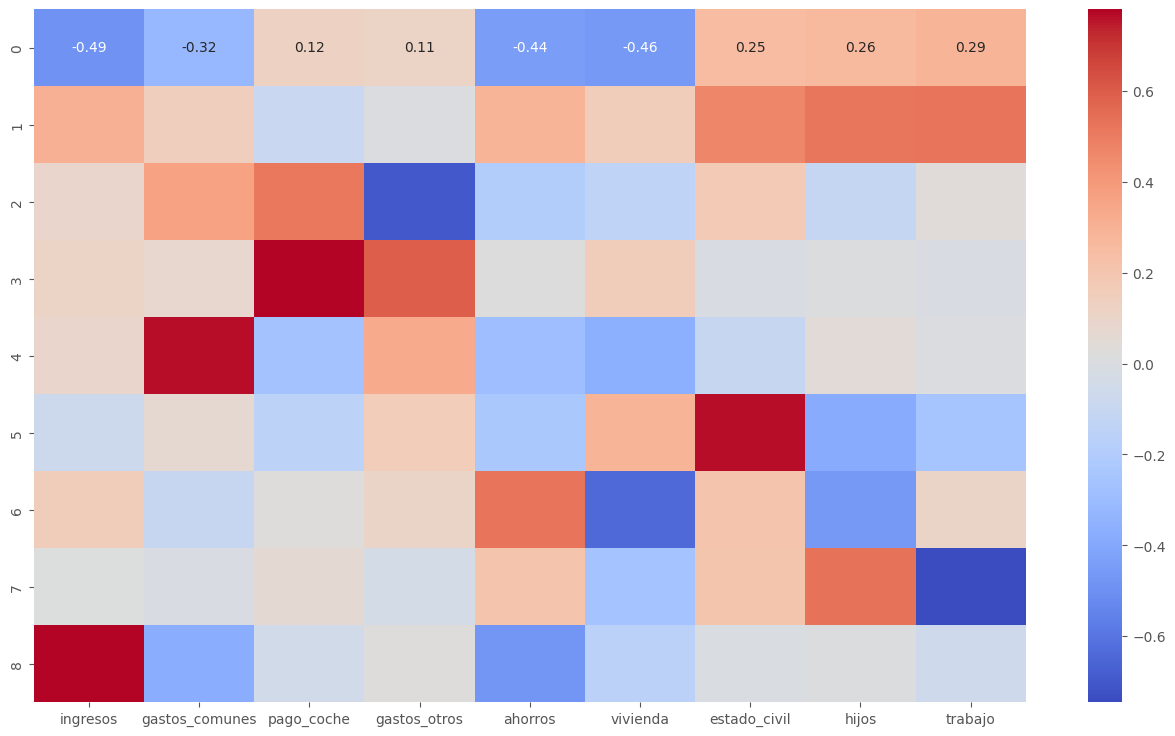

In [13]:
# Relacion entre los datos 
sb.heatmap(autovectores_df, cmap='coolwarm', annot=True)
plt.show()

/home/darok/Documentos/Escuela/IEDC/uteq/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/darok/Documentos/Escuela/IEDC/uteq/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/darok/Documentos/Escuela/IEDC/uteq/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/darok/Documentos/Escuela/IEDC/uteq/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

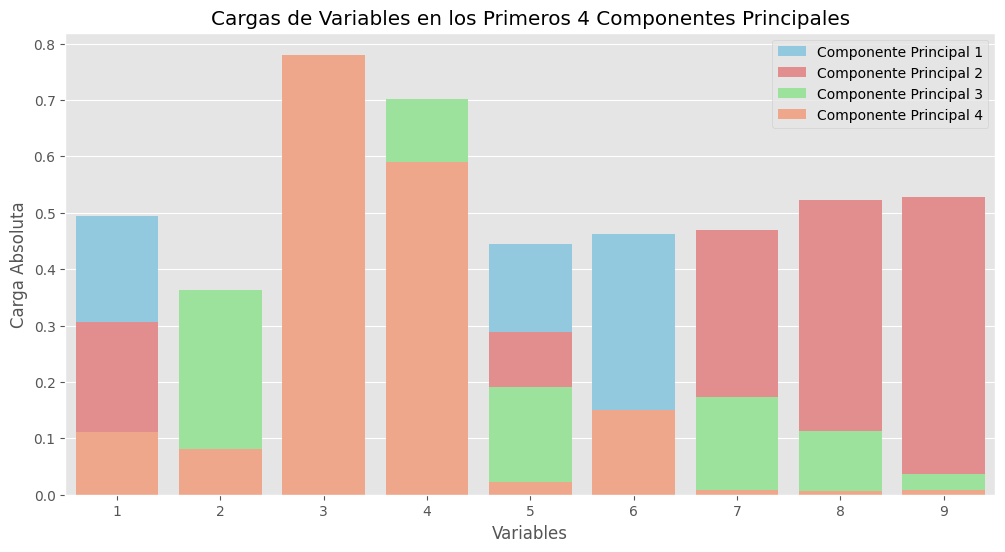

In [14]:
# grafica personalizada para visualizar los 4 componentes principales 
plt.figure(figsize=(12, 6))
sb.barplot(x=np.arange(1, X_scaled .shape[1] + 1), y=np.abs(autovectores_df.iloc[0]), color='skyblue', label='Componente Principal 1')
sb.barplot(x=np.arange(1, X_scaled .shape[1] + 1), y=np.abs(autovectores_df.iloc[1]), color='lightcoral', label='Componente Principal 2')
sb.barplot(x=np.arange(1, X_scaled  .shape[1] + 1), y=np.abs(autovectores_df.iloc[2]), color='lightgreen', label='Componente Principal 3')
sb.barplot(x=np.arange(1, X_scaled .shape[1] + 1), y=np.abs(autovectores_df.iloc[3]), color='lightsalmon', label='Componente Principal 4')
plt.xlabel('Variables')
plt.ylabel('Carga Absoluta')
plt.title('Cargas de Variables en los Primeros 4 Componentes Principales')
plt.legend()
plt.show()

In [16]:
# Seleccionar las 4 variables más importantes
variables = autovectores_df.iloc[:, :4].abs().idxmax()
print("Variables más importantes:\n", variables)

variables_mas_importantes = nombres[variables]

Variables más importantes:
 ingresos          8
gastos_comunes    4
pago_coche        3
gastos_otros      2
dtype: int64


In [18]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [19]:
# Ajustar un modelo predictivo (por ejemplo, Regresión Logística)
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Realizar predicciones y evaluar el rendimiento
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

Exactitud del modelo: 0.9512195121951219


In [21]:
print(X_pca.shape)

(202, 9)
